In [1]:
import pandas as pd
import numpy as np

#training set values
#url = 'https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv'
url = 'X_train.csv'
X = pd.read_csv(url,index_col=0)

#training set labels
#url = 'https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'
url='y_train.csv'
y = pd.read_csv(url,index_col=0)

#test set values
#url='https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv'
url = 'X_test.csv'
X_pred = pd.read_csv(url,index_col=0)

print("Loaded")

Loaded


In [2]:
## lets see numerical columns

a = X
b = y
c = a.join(b)

d = c.pivot_table(index=c.columns[-1], values=c.columns[0:-1],aggfunc=np.mean) 
#c.pivot_table(index=c.columns[-1], values=c.columns[0:-1],aggfunc=np.max) 
#c.pivot_table(index=c.columns[-1], values=c.columns[0:-1],aggfunc=np.min) 
d




,amount_tsh,construction_year,district_code,gps_height,latitude,longitude,num_private,population,region_code
status_group,,,,,,,,,
functional,461.798235,1345.567718,5.134660,740.131188,-5.704921,34.242071,0.539012,187.553303,13.616417
functional needs repair,267.071577,1168.406764,4.759092,627.607135,-5.162580,31.242086,0.307621,175.102154,15.443595
non functional,123.481230,1262.183491,6.494173,574.464774,-5.810394,34.381006,0.413950,170.016430,17.644585


In [3]:
for col in d.columns :
    print (col +": " +str(c[col].nunique()))
print ("c shape :" , c.shape)


amount_tsh: 98
construction_year: 55
district_code: 20
gps_height: 2428
latitude: 57517
longitude: 57516
num_private: 65
population: 1049
region_code: 27
c shape : (59400, 40)


In [4]:
cols = d.columns 
cols = cols.tolist()
cols.remove('latitude')
cols.remove('longitude')
cols.remove('num_private')
cols.append("status_group")
cols

['amount_tsh',
 'construction_year',
 'district_code',
 'gps_height',
 'population',
 'region_code',
 'status_group']

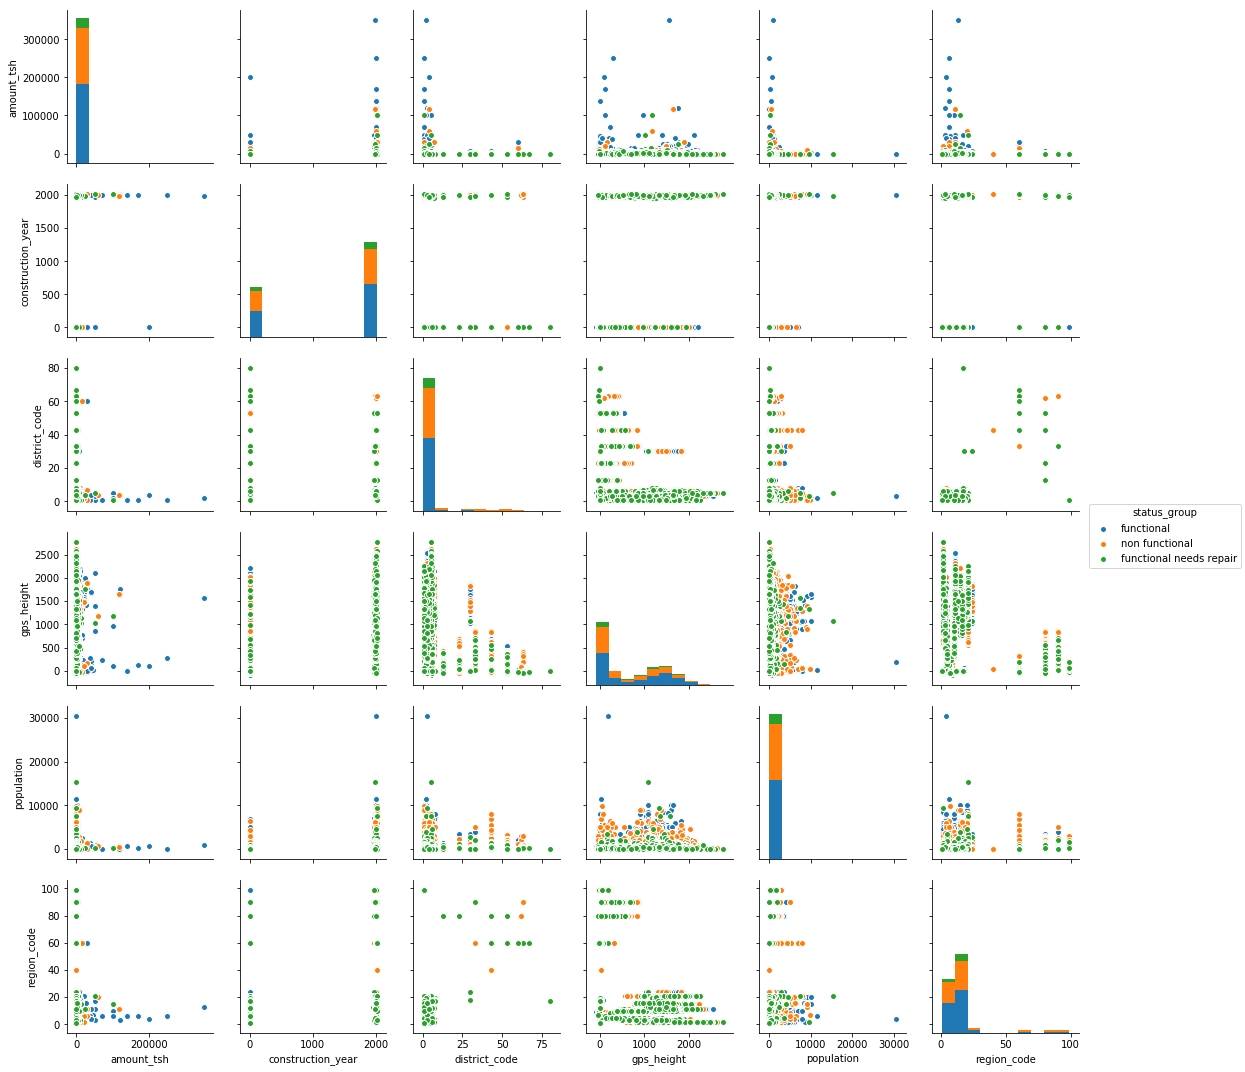

In [6]:
import seaborn as sns
#sns.stripplot(x='status_group', y='population', data=c, jitter=True)
#sns.stripplot(x='status_group', y='num_private', data=c, jitter=True)
#sns.stripplot(x='status_group', y='num_private', data=c, jitter=True)
g = sns.pairplot(c[cols], hue="status_group", size = 2.5)
g

In [ ]:
#construction year empty values
#district code
#region code
#long lat can be removed 


In [ ]:
"""
amount_tsh: 98
construction_year: 55
district_code: 20
gps_height: 2428
latitude: 57517
longitude: 57516
num_private: 65
population: 1049
region_code: 27
"""

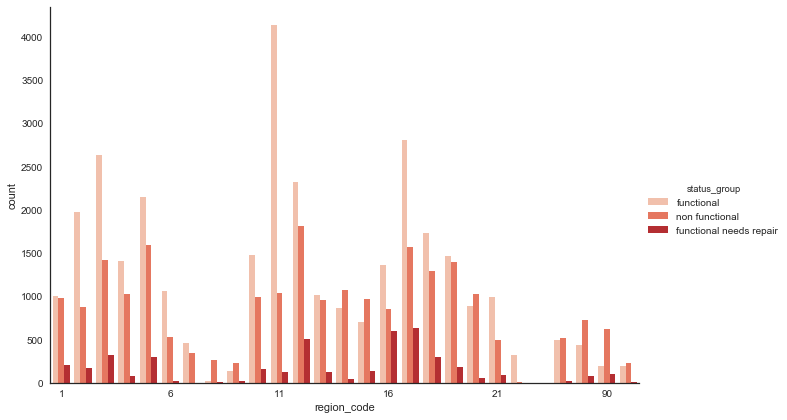

In [7]:
sns.set(style="white")
g = sns.factorplot(x="region_code",hue='status_group', data=c, kind="count",
                   palette="Reds", size=6, aspect=1.5)
g.set_xticklabels(step=5)

In [8]:
#negligible
c[['quality_group','num_private']].groupby('num_private').count().sort_values(by='quality_group',ascending=False).head(10)


,quality_group
num_private,
0,58643
6,81
1,73
8,46
5,46
32,40
45,36
15,35
39,30


In [9]:
X.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


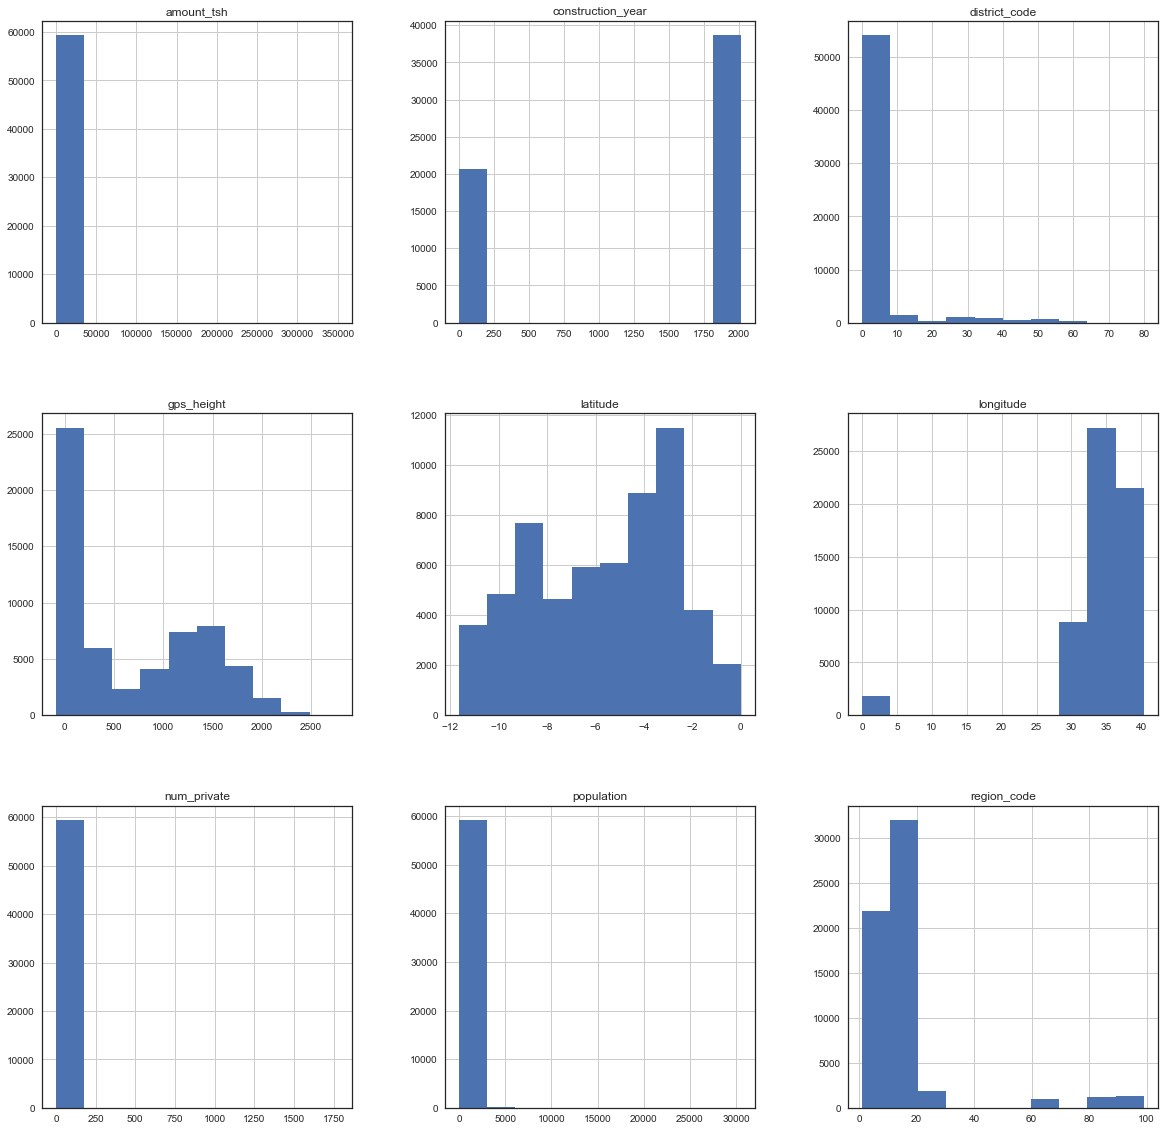

In [10]:
import matplotlib.pyplot as plt

X.hist(figsize = (20, 20))
plt.show()

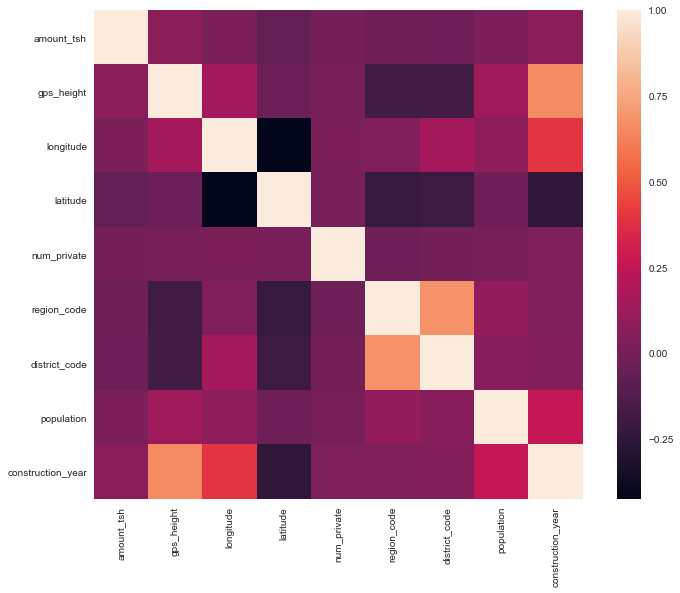

In [11]:
import seaborn as sns
#X.drop(['num_private'],inplace=True,axis=1)

corrmat = X.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

In [12]:
# Relevant numerical cols

num_cols = ['amount_tsh','gps_height','population','public_meeting','permit','construction_year']



In [13]:
### categorical columns
numerical = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols= [col for col in X.columns if col not in numerical ]



In [14]:
#nulls = False
# true false to 1 0 

def permit_public(X):
    X[['permit','public_meeting']] = X[['permit','public_meeting']].fillna(False)
    X.public_meeting = X.public_meeting.astype(int)
    X.permit = X.permit.astype(int)
    return X
    

X = permit_public(X)
X_pred = permit_public(X_pred)

In [15]:
a = X[cat_cols].apply(pd.Series.nunique)
a.sort_values()

recorded_by                  1
public_meeting               2
permit                       2
source_class                 3
management_group             5
quantity_group               5
quantity                     5
waterpoint_type_group        6
quality_group                6
payment_type                 7
source_type                  7
waterpoint_type              7
extraction_type_class        7
payment                      7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
date_recorded              356
funder                    1897
ward                      2092
installer                 2145
scheme_name               2696
subvillage               19287
wpt_name                 37400
dtype: int64

In [ ]:
# too many ['wpt_name','subvillage','scheme_name']


In [ ]:
#X['installer'].value_counts().plot(kind='bar')
#X[['quality_group','installer']].groupby('installer').count().sort_values(by='quality_group',ascending=False).head(10)
#X.pivot(index='date', columns='low', values='up')
#c.pivot_table(index='status_group', columns = 'installer',aggfunc=np.sum)

# nan to 0 and than drop installer
#X['installer'] = X['installer'].fillna(0)
#X['installer'] = X['installer'].fillna(0)
c.pivot_table(index='status_group', columns = 'installer',aggfunc=np.sum,fill_value=0)



In [16]:
X[['quality_group','installer']].groupby('installer').count().sort_values(by='quality_group',ascending=False).head(15)
X[['quality_group','installer']].groupby('installer').count().sort_values(by='quality_group',ascending=False).tail(15)


,quality_group
installer,
MP Mloka,1
MOSQUE,1
MOSES,1
MORNING CONSTRUCTION,1
MKONGO BUILDING CONTRACTOR,1
MBULU DISTRICT COUNCIL,1
MKONG CONSTRUCTION,1
MKON CONSTRUCTION,1
MISHENI,1


In [17]:
print(X.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null int32
recorded_by              59400 non-null obje

In [18]:
null_counts = X.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
subvillage             371
dtype: int64

In [ ]:
#a['permit'].value_counts().plot(kind='bar')


In [19]:
# all caategoric columns to categorical type

def data_tran (X):
        
    to_drop=['date_recorded','wpt_name','scheme_name','extraction_type_group','extraction_type',
             'waterpoint_type','source_type','source','quantity_group','subvillage','funder','installer']
    
    rel_cols = [col for col in cat_cols if col not in to_drop]
    
    # categorical to category
    
    X[rel_cols] = X[rel_cols].apply(pd.Series.astype, dtype='category')
    
    cols = num_cols + rel_cols
    
    return X[cols]

X = data_tran(X)
X_pred = data_tran(X_pred)

In [20]:
#Get Dummies

def getDummies(X):
    return pd.get_dummies(X)

X = getDummies(X)
X_pred = getDummies(X_pred)

print("done")

done


In [21]:
print(X.shape)
print(X_pred.shape)
print(y.shape)

(59400, 2338)
(14850, 2204)
(59400, 1)


In [22]:
bbb = [col for col in X_pred.columns if col not in X.columns]
X_pred.drop(bbb ,axis=1,inplace=True )
aaa = [col for col in X.columns if col not in X_pred.columns]
X.drop(aaa ,axis=1,inplace=True )

In [23]:
print(X.shape)
print(X_pred.shape)
print(y.shape)

(59400, 2198)
(14850, 2198)
(59400, 1)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=17)

In [ ]:
"""
import matplotlib.pyplot as plt

X_train.hist(figsize = (20, 20))
plt.show()
"""

In [ ]:
"""
#ADD Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



scaler = MinMaxScaler()

X_pred = scaler.transform(X_pred)

standatdscaler=StandardScaler()
X_pred = standatdscaler.transform(X_pred)
"""

In [25]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(X,y)
logreg.fit(X_train,y_train.values.ravel())

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train,y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

pred = logreg.predict(X_pred)

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.75


In [26]:
df = pd.DataFrame(pred,columns = ["status_group"],index=X_pred.index)
df.to_csv("Logreg.csv")




In [27]:
# Decition Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train,y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))


pred = clf.predict(X_pred)

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.76


In [28]:
#Create submission

df = pd.DataFrame(pred,columns = ["status_group"],index=X_pred.index)
df.to_csv("DecitionTree.csv")

In [ ]:
# K nearest 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
pred = knn.predict(X_pred)

In [ ]:
df = pd.DataFrame(pred,columns = ["status_group"],index=X_pred.index)
df.to_csv("Knn.csv")